In [2]:
# Terminal / Anaconda Navigator: conda install -c conda-forge gensim
import pickle
from gensim import matutils, models
import scipy.sparse
import pandas as pd
from gensim.models import CoherenceModel

In [9]:
f_data = pd.read_csv('../data/negativeTweets.csv')
f_data

,Datetime,Tweet Id,OriginalText,Username,Text_Cleaned,tokens,Text,Subjectivity,Polarity,NumberOfWords,MeanWordLength,P&SSentiment,SIA Positive Sentiment,SIA Neutral Sentiment,SIA Negative Sentiment,Class
0,2021-10-27 23:39:35+00:00,1453506696094142469,@1goonrich Buy Dogus and make it 700k mc #NFTG...,aacryp,buy dogus and make it mc kishu hoge froge dog...,"['buy', 'dogus', 'make', 'kishu', 'hoge', 'fro...",buy dogus make kishu hoge froge doge dogus thi...,0.427273,-0.131818,29,5.69,Negative,0.000001,1.000001,0.000001,1
1,2021-10-27 23:32:41+00:00,1453504957991292933,💧 SupreSpace Metaverse 2nd Round Airdrop 💧\n\n...,AirdropStario,suprespace metaverse round airdrop task up to...,"['suprespace', 'round', 'airdrop', 'task', 'sa...",suprespace round airdrop task sapce referral s...,0.400000,-0.200000,10,6.60,Negative,0.000001,1.000001,0.000001,1
2,2021-10-27 23:31:03+00:00,1453504546345455619,@Elite_Portraits is now LIVE hand-crafting the...,DeployStarShip,is now live hand crafting the artwork for the ...,"['live', 'hand', 'crafting', 'artwork', 'plane...",live hand crafting artwork planet game claim p...,0.450000,-0.131818,14,5.93,Negative,0.198001,0.802001,0.000001,0
3,2021-10-27 23:21:00+00:00,1453502019176734729,"Gas sucks, but you know what's worse?? One day...",warcrnft,gas sucks but you know whatworse one day knowi...,"['gas', 'sucks', 'know', 'whatworse', 'day', '...",gas sucks know whatworse day know wow collecti...,0.650000,-0.100000,12,5.83,Negative,0.340001,0.426001,0.234001,1
4,2021-10-27 23:13:01+00:00,1453500008506937345,@jemimajoanna @JanetMurray Brilliant article @...,uninhabited,brilliant article amp global headless ponzi sc...,"['brilliant', 'article', 'global', 'headless',...",brilliant article global headless ponzi scheme...,0.491667,-0.033333,19,6.21,Negative,0.230001,0.547001,0.223001,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25357,2022-06-18 18:59:23+00:00,1538234939715780608,@digitalman789 @XANAMetaverse 子供の頃、鉄道模型のジオラマに憧...,ClawnToppi,子供の頃 鉄道模型のジオラマに憧れたのを思い出しちゃいました xana 内を 一般に人気のあ...,"['Zi Gong noQing ', 'Tie Dao Mo Xing noziorama...",Zi Gong noQing Tie Dao Mo Xing nozioramaniCho...,0.000000,0.000000,45,5.96,Neutral,0.000001,0.881001,0.119001,1
25358,2022-06-18 18:57:31+00:00,1538234472080060416,Crazy girl crazy hair 🤪👧🤪👩‍🦰\n\n#NFTCommunity ...,UnicornsMutants,crazy girl crazy hair,"['crazy', 'girl', 'crazy', 'hair']",crazy girl crazy hair,0.900000,-0.600000,4,4.50,Negative,0.000001,0.294001,0.706001,1
25359,2022-06-18 18:56:33+00:00,1538234226109255683,Yeni Haber CoinNews:\nBillionaire Lee Cooperma...,sosyalilgi,yeni haber coinnews billionaire lee cooperman ...,"['yeni', 'haber', 'coinnews', 'billionaire', '...",yeni haber coinnews billionaire lee cooperman ...,0.550000,-0.650000,16,5.75,Negative,0.000001,0.722001,0.278001,1
25360,2022-06-18 18:55:09+00:00,1538233875704745984,🌟 @RichQuack 💎 No Doubt!\n🥇New #Metaverse co...,QuackCollector,no doubt new coming are building their own wor...,"['doubt', 'new', 'coming', 'building', 'world'...",doubt new coming building world world already ...,0.477273,0.136364,10,5.80,Positive,0.000001,0.783001,0.217001,1


In [10]:
#f_data.rename(columns = {'Text':'OriginalText', 'Text_Cleaned':'Text'}, inplace = True)

In [11]:
f_data = f_data.loc[f_data['Datetime'] >= '2021-11-08']

In [12]:
f_data = f_data.loc[f_data['Datetime'] <= '2021-11-12']

In [13]:
f_data

,Datetime,Tweet Id,OriginalText,Username,Text_Cleaned,tokens,Text,Subjectivity,Polarity,NumberOfWords,MeanWordLength,P&SSentiment,SIA Positive Sentiment,SIA Neutral Sentiment,SIA Negative Sentiment,Class
1318,2021-11-08 23:57:51+00:00,1457859944007438336,The project is implemented professionally and ...,Andi11112222,the project is implemented professionally and ...,"['implemented', 'professionally', 'hasclear', ...",implemented professionally hasclear developmen...,0.433333,0.633333,13,7.92,Positive,0.128001,0.668001,0.204001,0
1319,2021-11-08 23:53:42+00:00,1457858900124835843,💸Random #NFT drops are still happening in #Run...,RuneMetaverse,random drops are still happening in trinkets g...,"['random', 'drops', 'still', 'happening', 'tri...",random drops still happening trinkets guardian...,0.500000,-0.500000,13,5.46,Negative,0.167001,0.833001,0.000001,0
1320,2021-11-08 23:53:18+00:00,1457858802833784833,"Heii friend, every 10 pmask characters launch,...",Nolifegang51,heii friend every pmask characters launch the...,"['heii', 'friend', 'every', 'pmask', 'characte...",heii friend every pmask characters launch alwa...,0.142857,-0.071429,12,6.75,Negative,0.370001,0.520001,0.110001,1
1321,2021-11-08 23:51:42+00:00,1457858399970873346,My only fear with the #Metaverse is that it wi...,Gino_flo,my only fear with the is that it will be so go...,"['fear', 'good', 'normal', 'life', 'appear', '...",fear good normal life appear depressing,0.716667,0.083333,6,5.67,Positive,0.248001,0.256001,0.496001,0
1322,2021-11-08 23:51:05+00:00,1457858244861480969,The next coming years in crypto will be all ab...,PrrplFrog,the next coming years in crypto will be all ab...,"['next', 'coming', 'years', 'big', 'money', 'p...",next coming years big money preparing throwing...,0.133333,-0.166667,19,5.68,Negative,0.109001,0.739001,0.152001,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1618,2021-11-11 22:15:39+00:00,1458921388643962897,@BenBuckwalter Why Choose #FLOKI Valhalla #Met...,PaInIaMs,why choose valhalla upgradeable valhalla scarc...,"['choose', 'valhalla', 'upgradeable', 'valhall...",choose valhalla upgradeable valhalla scarce ge...,0.525000,-0.100000,23,6.83,Negative,0.083001,0.917001,0.000001,1
1619,2021-11-11 22:15:39+00:00,1458921388010618880,Verasity in Top 10 gaming Tokes by Market Capi...,kindasset,verasity in top gaming tokes by market capita...,"['verasity', 'top', 'gaming', 'tokes', 'market...",verasity top gaming tokes market capitalizatio...,0.387500,0.150000,22,6.32,Positive,0.075001,0.833001,0.092001,1
1620,2021-11-11 22:15:27+00:00,1458921338459111428,"Let's aim for more #EXP and #NFTs rewards , on...",flexy_ahs,letaim for more and rewards once we start to p...,"['letaim', 'rewards', 'start', 'play', 'later'...",letaim rewards start play later donmissed laun...,0.200000,-0.200000,11,5.55,Negative,0.497001,0.503001,0.000001,0
1621,2021-11-11 22:13:11+00:00,1458920769254309890,@ProTheDoge Why Choose #FLOKI Valhalla #Metave...,PaInIaMs,why choose valhalla upgradeable valhalla scarc...,"['choose', 'valhalla', 'upgradeable', 'valhall...",choose valhalla upgradeable valhalla scarce ge...,0.525000,-0.100000,23,6.83,Negative,0.083001,0.917001,0.000001,1


In [14]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(f_data.Text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = f_data.index

In [15]:
# One of the required inputs is a term-document matrix
tdm = data_dtm.transpose()
tdm.head()

,1318,1319,1320,1321,1322,1323,1324,1325,1326,1327,...,1613,1614,1615,1616,1617,1618,1619,1620,1621,1622
abilities,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aboutlive,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
accepting,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
accounts,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(data_dtm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [18]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
cv = pickle.load(open("../data/cv_stop.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

/usr/local/lib/python3.9/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.18.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [19]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=1)
lda.print_topics()

[(0,
  '0.004*"appease" + 0.003*"adjectives" + 0.003*"airport" + 0.003*"analysis" + 0.003*"accomplished" + 0.003*"alienates" + 0.003*"anthony" + 0.003*"animals" + 0.003*"abcs" + 0.003*"antique"'),
 (1,
  '0.003*"area" + 0.003*"argh" + 0.003*"absolutely" + 0.003*"anecdote" + 0.003*"aah" + 0.003*"americans" + 0.003*"absofuckinglutely" + 0.003*"accutane" + 0.003*"arches" + 0.003*"airways"')]

In [20]:
# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)]
    return ' '.join(all_nouns)

In [21]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns = pd.DataFrame(f_data.Text.apply(nouns))
data_nouns

,Text
1318,development plan byvery team doubt
1319,random drops trinkets eggs drops map
1320,heii friend pmask characters characters figure
1321,life
1322,years money money everything plebs run rfox rndr
...,...
1618,valhalla valhalla scarce genesis game power ab...
1619,verasity gaming tokes market capitalization da...
1620,letaim rewards launching game play dge
1621,valhalla valhalla scarce genesis game power ab...


In [22]:
# Create a new document-term matrix using only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said','game','discord','tweet','twitter'
                  'retweet','check','play','join','world','thing','coinnews']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.Text)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn

,abilities,accounts,acin,action,address,advance,advantage,advice,advisor,age,...,yukari,yukselis,zhong,zil,zinu,zombie,zombies,zuck,zuckerburg,zucks
1318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1319,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1320,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1321,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1322,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1618,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1619,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1621,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [24]:
# Let's try topics = 3
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=1)
ldan.print_topics()

[(0,
  '0.005*"days" + 0.004*"gem" + 0.004*"reality" + 0.004*"life" + 0.004*"team" + 0.004*"day" + 0.003*"battle" + 0.003*"greed" + 0.003*"pay" + 0.003*"weeks"'),
 (1,
  '0.006*"launch" + 0.005*"team" + 0.005*"doubt" + 0.005*"reality" + 0.004*"life" + 0.004*"space" + 0.004*"art" + 0.004*"wars" + 0.004*"drop" + 0.004*"valhalla"')]

In [25]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)]
    return ' '.join(nouns_adj)

In [26]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns_adj = pd.DataFrame(f_data.Text.apply(nouns_adj))
data_nouns_adj

,Text
1318,hasclear development plan byvery team doubt best
1319,random drops trinkets guardian eggs drops map
1320,heii friend pmask characters limited character...
1321,good normal life
1322,next years big money money everything fail ple...
...,...
1618,choose valhalla upgradeable valhalla scarce ge...
1619,verasity top gaming tokes market capitalizatio...
1620,letaim rewards launching game play dge
1621,choose valhalla upgradeable valhalla scarce ge...


In [27]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.Text)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna

,abilities,able,aboutlive,accounts,acin,action,active,address,advance,advantage,...,yukari,yukselis,zhong,zil,zinu,zombie,zombies,zuck,zuckerburg,zucks
1318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1319,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1320,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1321,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1322,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1618,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1619,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1621,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [44]:
# Let's try 3 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=8, id2word=id2wordna, passes=1)
ldana.print_topics()

[(0,
  '0.011*"real" + 0.008*"life" + 0.006*"second" + 0.005*"wars" + 0.005*"use" + 0.005*"new" + 0.005*"live" + 0.005*"williams" + 0.005*"meet" + 0.005*"ceo"'),
 (1,
  '0.008*"virtual" + 0.008*"way" + 0.007*"reality" + 0.006*"ownership" + 0.005*"days" + 0.005*"release" + 0.005*"earth" + 0.005*"launch" + 0.005*"events" + 0.005*"land"'),
 (2,
  '0.008*"new" + 0.008*"drop" + 0.006*"real" + 0.006*"token" + 0.006*"collectible" + 0.006*"reality" + 0.006*"low" + 0.006*"cap" + 0.006*"money" + 0.005*"future"'),
 (3,
  '0.006*"virtual" + 0.006*"active" + 0.006*"heavy" + 0.006*"launch" + 0.005*"new" + 0.004*"real" + 0.004*"low" + 0.004*"airdrop" + 0.004*"wars" + 0.004*"team"'),
 (4,
  '0.008*"years" + 0.006*"quest" + 0.006*"space" + 0.006*"gem" + 0.006*"week" + 0.006*"paper" + 0.006*"friends" + 0.006*"future" + 0.005*"hot" + 0.005*"social"'),
 (5,
  '0.010*"art" + 0.010*"isna" + 0.008*"league" + 0.008*"normal" + 0.008*"launch" + 0.006*"investment" + 0.006*"new" + 0.006*"big" + 0.006*"greed" + 0.

In [34]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
def create_wordcloud(model, topic):
    text = {word: value for word, value in model.show_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic" + " "+ str(topic))
    plt.show()
create_wordcloud(ldana,2)

IndexError: index 2 is out of bounds for axis 0 with size 2

In [35]:
from gensim import corpora
word2id = dict((k, v) for k, v in cvna.vocabulary_.items())
d = corpora.Dictionary()
d.id2token = id2word
d.token2id = word2id

In [36]:
#import pyLDAvis
# Visualize the topics
#pyLDAvis.enable_notebook()
#LDAvis_prepared = pyLDAvis..prepare(ldana, corpusna, d)
#LDAvis_prepared

In [37]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    lda_model = models.LdaMulticore(corpus=corpus, num_topics=k, id2word=dictionary, passes=10,alpha=a,
                                           eta=b)
    coherence_model_lda = CoherenceModel(model=lda_model, corpus=corpus,dictionary=dictionary, coherence='u_mass')
    return coherence_model_lda.get_coherence()

In [38]:
#compute_coherence_values(corpusna,d,2,0.1,0.4)

In [39]:
import numpy as np
from gensim import models
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 2
max_topics = 10
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
model_results = {
                 'Topics': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
        # iterate through number of topics
    for k in topics_range:
                    # get the coherence score for the given parameters
            print(k)
            cv = compute_coherence_values(corpus=corpusna, dictionary=d,
                                                  k=k, a=0.5, b=0.5)
                    # Save the model results
            model_results['Topics'].append(k)
            model_results['Coherence'].append(cv)

2
3
4
5
6
7
8
9


In [40]:
model_results

{'Topics': [2, 3, 4, 5, 6, 7, 8, 9],
 'Coherence': [-20.653502117591607,
  -20.234641812410207,
  -20.02801212850409,
  -19.533696374235674,
  -19.62932243838804,
  -19.064542364350768,
  -19.500568974661135,
  -18.973403520483913]}

In [41]:
results = pd.DataFrame(model_results)

In [42]:
grouped = (results.groupby(['Topics'], as_index=False)).mean()

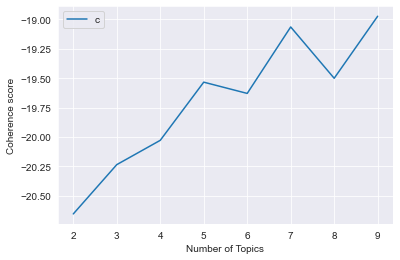

In [43]:
#Plot multidimensionale?
import matplotlib.pyplot as plt
def plot_graph(model_results):
    plt.plot(grouped['Topics'], grouped['Coherence'])
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

plot_graph(model_results)

In [195]:
results.to_csv("../data/resultsLDA062022.csv",index=False)